3)	Use “bill_authentication.csv” dataset. Your task is to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are variance of wavelet transformed image, curtosis of the image, entropy and skewness of the image.

In [1]:
pip install pandas.tools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools


In [2]:
import numpy as np
import pandas as pd
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
#from matplotlib import pyplot
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from pickle import dump, load
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
df = pd.read_csv('bill_authentication.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,1


In [5]:
df.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
df.shape

(1372, 5)

In [7]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.446064
std,2.842763,5.869047,4.310030,2.101013,0.497264
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [9]:
df['Class'].value_counts()

0    760
1    612
Name: Class, dtype: int64

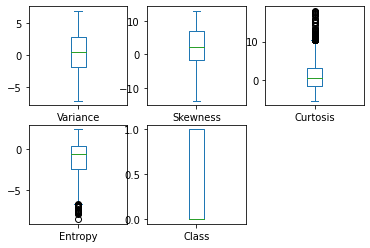

In [10]:
# Visualization
#BOx & whisker plots
df.plot(kind='box',subplots=True, layout=(2,3),sharex=False,sharey=False)
plt.show()

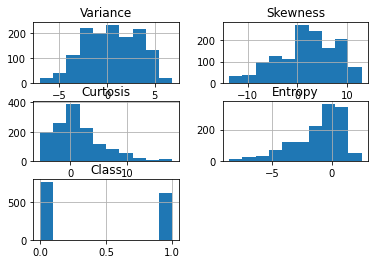

In [11]:
#Histograms
df.hist()
plt.show()

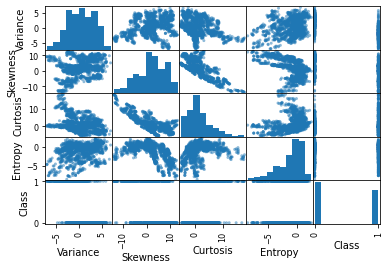

In [12]:
#Scatter plot matrix
scatter_matrix(df)
plt.show()

In [13]:
# Standardizing the Dataset
array =df.values
# seperate array into input and output components
x = array[:,0:4]
y = array[:,4]

scaler = StandardScaler().fit(x)

rescaledx=scaler.fit_transform(x)

set_printoptions(precision=3)
print(rescaledx[0:5,:])

[[ 1.122  1.149 -0.976  0.355]
 [ 1.447  1.064 -0.895 -0.129]
 [ 1.208 -0.777  0.122  0.618]
 [ 1.064  1.295 -1.255 -1.144]
 [-0.037 -1.087  0.737  0.097]]


In [14]:
#Evaluate some Algorithms
#Split-out validation dataset
array = df.values
x = array[:,0:4]
y = array[:,4]
validation_size = 0.20 #testing size
seed = 7 # random state ,eans it going to generate input atrribute again and again
x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=validation_size, random_state=42)
x_train.shape

(1097, 4)

In [15]:
x_validation.shape

(275, 4)

In [16]:
#Compare Machine Learning Algorithms
#Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,x_train, y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s = %f  (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

LR = 0.950801  (0.019176)
LDA = 0.944420  (0.018796)
KNN = 0.965371  (0.015164)
CART = 0.925279  (0.025347)
NB = 0.825880  (0.034033)
SVM = 0.961726  (0.019891)


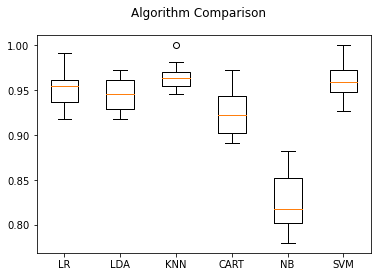

In [17]:
# Compare Algorithms
fig =plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
#Confusion matrix & Classification report
LR = LogisticRegression()
LR.fit(x_train,y_train)
predictions = LR.predict(x_validation)

In [19]:
print(accuracy_score(y_validation,predictions))

0.9818181818181818


In [20]:
print(confusion_matrix(y_validation,predictions))

[[143   4]
 [  1 127]]


In [21]:
print(classification_report(y_validation,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       147
         1.0       0.97      0.99      0.98       128

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [22]:
print(y_validation)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.]


In [23]:
print(predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.]


In [24]:
#Finalizing the model with pickle
#finalizing the model
array = df.values
x= array[:,0:4]
y= array[:,4]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=7)

#fit the model on 33%
model = LogisticRegression()
model.fit(x_train,y_train)

#save the model to disk
filename = "finaized_model.sav"
dump(model,open(filename,'wb'))
# some time later...
# Load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print("Accuracy = ",(result*100))

Accuracy =  95.80573951434879
